# About DataSet

### Visual Apparent Magnitude of the Star: This is a measure of how bright a star appears to an observer on Earth. It is usually denoted by the symbol "m" and measured in units of magnitude.

### Distance Between the Star and the Earth: This is the distance between the star and the Earth, usually measured in units of parsecs or light-years

### Standard Error of star and earth: This is a measure of the precision of the measurements of the star and the Earth, often expressed as a percentage or a fraction of the measured value.

### B-V color index: This is a measure of the color of a star, based on the difference in brightness between two different wavelengths of light, usually in the blue and visible part of the spectrum.

### Spectral type: This is a classification scheme for stars based on their spectral features, such as the presence of certain absorption lines or emission lines in their spectra.

### Absolute Magnitude of the Star: This is a measure of the intrinsic brightness of a star, which is the brightness it would have if it were located at a standard distance of 10 parsecs from Earth. It is usually denoted by the symbol "M" and measured in units of magnitude.

# import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") ## removing warning msg

# Load Dataset

In [3]:
star = pd.read_csv("C:\\Users\\SATHYANARAYANA M\\Downloads\\1new Star39552_balanced.csv")

In [4]:
star.head() ## visual the data

,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Spectral type,Absolute Magnitude of the Star,star
0,10.00,31.66,6.19,1.213,K7V,22.502556,Gaint
1,8.26,3.21,1.00,1.130,K0III,15.792525,Dwarf
2,8.27,12.75,1.06,0.596,F9V,18.797552,Gaint
3,6.54,5.23,0.76,1.189,K1III,15.132508,Dwarf
4,8.52,0.96,0.72,0.173,B8V,13.431356,Gaint


In [5]:
print(f"Rows, Cols - After: {star.shape[0], star.shape[1]}")

Rows, Cols - After: (39552, 7)


In [6]:
print("DATA INFORMATION")
print('************************')
print(star.info())

DATA INFORMATION
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Visual Apparent Magnitude of the Star    39552 non-null  float64
 1   Distance Between the Star and the Earth  39552 non-null  float64
 2   Standard Error of star ad earth          39552 non-null  float64
 3   B-V color index                          39552 non-null  float64
 4   Spectral type                            39552 non-null  object 
 5   Absolute Magnitude of the Star           39552 non-null  float64
 6   star                                     39552 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.1+ MB
None


## Checking null values

In [7]:
star.isnull().sum()/star.shape[0]*100

Visual Apparent Magnitude of the Star      0.0
Distance Between the Star and the Earth    0.0
Standard Error of star ad earth            0.0
B-V color index                            0.0
Spectral type                              0.0
Absolute Magnitude of the Star             0.0
star                                       0.0
dtype: float64

## no null values

******************************************************************************************************

#### The absolute magnitude of stars can vary widely, depending on their size, temperature, and distance from us. Here are some rough ranges of absolute magnitudes for different types of stars:

##### O-type stars (the hottest and most massive): -6 to -2
##### B-type stars: -2 to +2
##### A-type stars: +2 to +5
##### F-type stars: +2 to +6
##### G-type stars (like the Sun): +5 to +6
##### K-type stars: +6 to +8
##### M-type stars (the coolest and least massive): +8 to +15

## The "Amag" column values are wrong !! So let's create a new column with the correct absolute magnitude values.

In [8]:
#### M = m - 5(log10d - 1)
#### M is the absolute magnitude of the star
#### m is the apparent magnitude of the star (as observed from Earth)
#### d is the distance to the star in parsecs
#### log10 is the base-10 logarithm function

In [95]:
star['B-V color index'] = np.array(star["B-V color index"], dtype=float)
star['Visual Apparent Magnitude of the Star'] = np.array(star["Visual Apparent Magnitude of the Star"], dtype=float)
star['Distance Between the Star and the Earth'] = np.array(star["Distance Between the Star and the Earth"], dtype=float)

In [96]:
dispc = (1000/star['Distance Between the Star and the Earth']) # Plx (mas)
star['Absolute Magnitude of the Star'] = star['Visual Apparent Magnitude of the Star']-5*np.log10(dispc/10) # Absolute magnitude
star["Absolute Magnitude of the Star"] = star['Absolute Magnitude of the Star']

## after impliment of formula

In [97]:
star["Absolute Magnitude of the Star"]

0        7.502555
1        0.792525
2        3.797551
3        0.132508
4       -1.568644
           ...   
39547   -8.017755
39548    3.340791
39549    2.159748
39550    0.651898
39551    2.030317
Name: Absolute Magnitude of the Star, Length: 39552, dtype: float64

## Checking null values

In [98]:
star.isnull().sum()/star.shape[0]*100

Visual Apparent Magnitude of the Star      0.0000
Distance Between the Star and the Earth    0.0000
Standard Error of star ad earth            0.0000
B-V color index                            0.0000
Spectral type                              0.0000
Absolute Magnitude of the Star             2.8393
star                                       0.0000
dtype: float64

## After fill null values with mean

In [100]:
star['Absolute Magnitude of the Star']=star['Absolute Magnitude of the Star'].fillna(star['Absolute Magnitude of the Star'].mean())

In [101]:
star.isnull().sum()/star.shape[0]*100

Visual Apparent Magnitude of the Star      0.0
Distance Between the Star and the Earth    0.0
Standard Error of star ad earth            0.0
B-V color index                            0.0
Spectral type                              0.0
Absolute Magnitude of the Star             0.0
star                                       0.0
dtype: float64

In [104]:
print(star.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(star.columns)

   Visual Apparent Magnitude of the Star  \
0                                  10.00   
1                                   8.26   
2                                   8.27   
3                                   6.54   
4                                   8.52   

   Distance Between the Star and the Earth  Standard Error of star ad earth  \
0                                    31.66                             6.19   
1                                     3.21                             1.00   
2                                    12.75                             1.06   
3                                     5.23                             0.76   
4                                     0.96                             0.72   

   B-V color index Spectral type  Absolute Magnitude of the Star   star  
0            1.213           K7V                        7.502555  Gaint  
1            1.130         K0III                        0.792525  Dwarf  
2            0.596           F9V      

## Analysising in math formate

In [105]:
print("DATA DESCRIPTION")
print('*********************')
star.describe()

DATA DESCRIPTION
*********************


,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Absolute Magnitude of the Star
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,1.166019
std,1.308857,12.446291,0.788133,0.513987,2.284539
min,-0.620000,-27.840000,0.420000,-0.400000,-13.064850
25%,7.210000,2.430000,0.800000,0.358000,-0.088013
50%,8.160000,4.440000,0.990000,0.703000,1.134358
75%,8.830000,8.232500,1.230000,1.129000,2.582401
max,12.850000,772.330000,40.630000,3.440000,15.449015


## Checking Precentail

In [ ]:
## Checking percentiles can be helpful in various contexts.
## 1)Evaluating performance
## 2)Understanding data distribution
## 3)Setting benchmarks

In [13]:
print('CHECKING PERCENTAIL')
print('*****************************')
star.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

CHECKING PERCENTAIL
*****************************


,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Absolute Magnitude of the Star
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687
std,1.308857,12.446291,0.788133,0.513987,2.443937
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000
1%,4.030000,-0.890000,0.500000,-0.144490,8.716232
2%,4.700000,-0.280000,0.530000,-0.107000,10.251000
3%,5.040000,0.040000,0.550000,-0.083000,11.019752
4%,5.310000,0.280000,0.570000,-0.063000,11.630982
5%,5.510000,0.460000,0.590000,-0.046000,12.033426
6%,5.670000,0.620000,0.600000,-0.030000,12.375534


## cheaking duplicate 

In [14]:
print(star.duplicated().any()) ### any() function is a built-in function that returns True if at 
                               #### least one element in an iterable object is True, and False otherwise.
print(star[star.duplicated()])

False
Empty DataFrame
Columns: [Visual Apparent Magnitude of the Star, Distance Between the Star and the Earth, Standard Error of star ad earth, B-V color index, Spectral type, Absolute Magnitude of the Star, star]
Index: []


##### There is no Duplicate value

In [15]:
star.head()

,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Spectral type,Absolute Magnitude of the Star,star
0,10.00,31.66,6.19,1.213,K7V,22.502556,Gaint
1,8.26,3.21,1.00,1.130,K0III,15.792525,Dwarf
2,8.27,12.75,1.06,0.596,F9V,18.797552,Gaint
3,6.54,5.23,0.76,1.189,K1III,15.132508,Dwarf
4,8.52,0.96,0.72,0.173,B8V,13.431356,Gaint


#### Class	                    
****************************************
#### O	                 blue
#### B		                        blue white
#### A		                        white
#### F	                            yellow white
#### G		                       yellow
#### K	                           light orange
#### M		                       orange red

## extracting spectral column

In [18]:
for i in range(len(star['Spectral type'])):
    star.loc[i, 'Spectral type'] = star['Spectral type'][i][0]

In [19]:
star['Spectral type']

0        K
1        K
2        F
3        K
4        B
        ..
39547    B
39548    F
39549    A
39550    M
39551    F
Name: Spectral type, Length: 39552, dtype: object

In [20]:
star.value_counts('Spectral type') #### checking the value of counts

Spectral type
K    12425
G     7951
F     7370
B     5203
A     4547
M     1893
O      108
C       51
W        3
N        1
dtype: int64

In [21]:
## value of counts of depended varialbe(star)
star.value_counts('star')

star
Dwarf    19776
Gaint    19776
dtype: int64

## spliting data numeric and categorical

## Numeric

In [22]:
numeric=star.select_dtypes(exclude = 'object')

In [23]:
numeric

,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Absolute Magnitude of the Star
0,10.00,31.66,6.19,1.213,22.502556
1,8.26,3.21,1.00,1.130,15.792525
2,8.27,12.75,1.06,0.596,18.797552
3,6.54,5.23,0.76,1.189,15.132508
4,8.52,0.96,0.72,0.173,13.431356
...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,6.982245
39548,7.05,18.12,0.92,0.424,18.340790
39549,9.21,3.89,1.46,0.227,17.159748
39550,9.01,2.13,1.46,1.467,15.651898


## categroical

In [24]:
categroical=star.select_dtypes(include = 'object')

In [25]:
categroical

,Spectral type,star
0,K,Gaint
1,K,Dwarf
2,F,Gaint
3,K,Dwarf
4,B,Gaint
...,...,...
39547,B,Dwarf
39548,F,Gaint
39549,A,Gaint
39550,M,Dwarf


## Univariant Analysis

#### KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

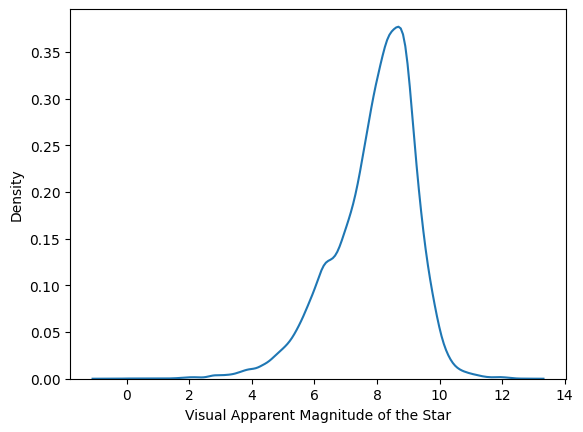

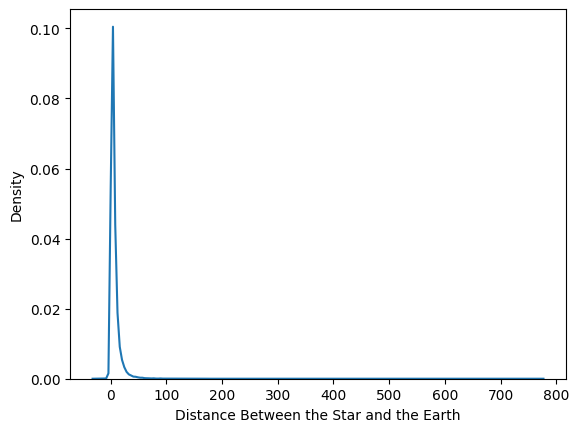

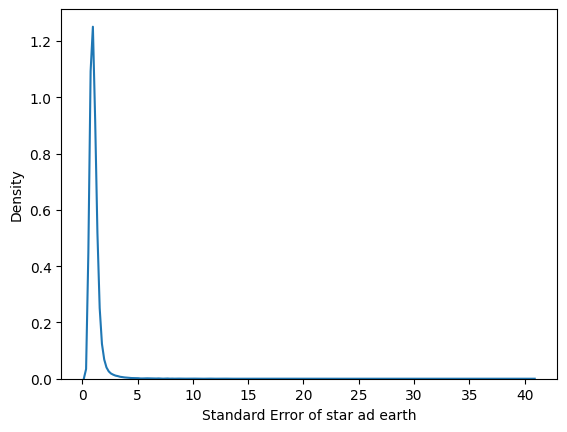

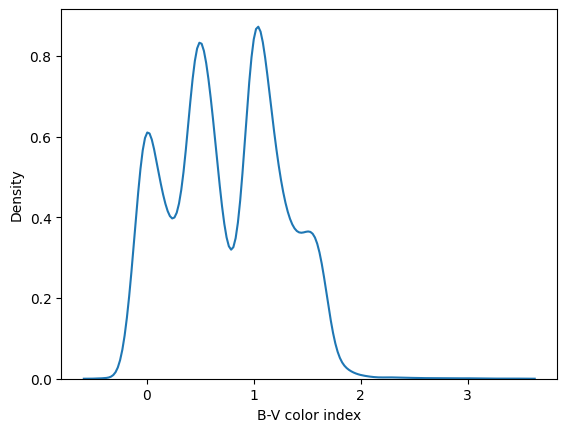

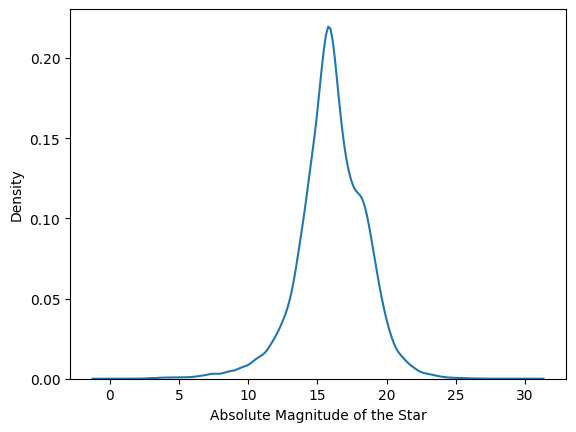

In [26]:
for i in numeric.columns:
    sns.kdeplot(data = numeric,x = numeric[i])
    plt.show()

## Absolute magnitudeof star in better normal disribution compare to all column
##### Absolute magnitude is a measure of the intrinsic brightness of a star, meaning how bright the star would appear if it were located at a standard distance of 10 parsecs (32.6 light years) from Earth. It is denoted by the symbol "M".
#### If the absolute magnitude of a star is positive, it means the star is brighter than the standard 10 parsec star, and if it is negative, it means the star is dimmer than the standard 10 parsec star.

# Box Plot

## Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data.

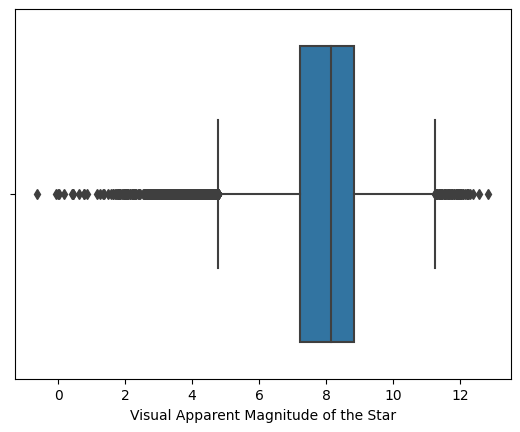

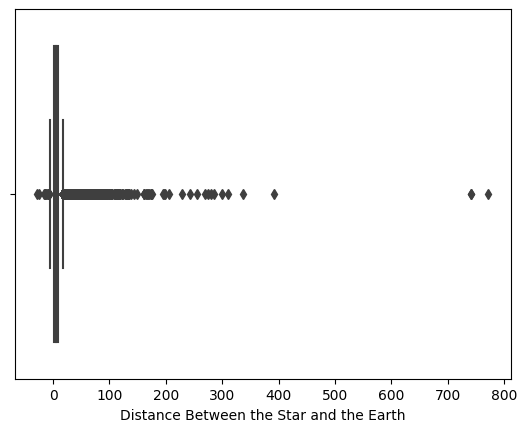

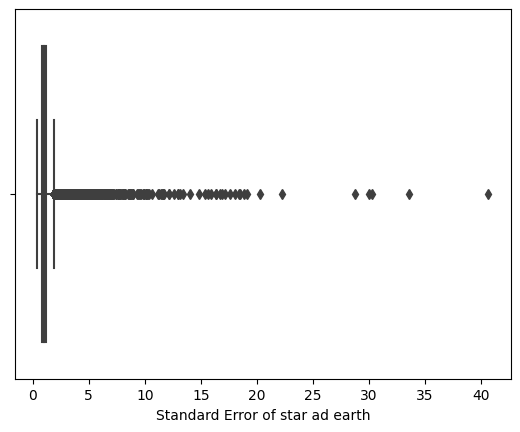

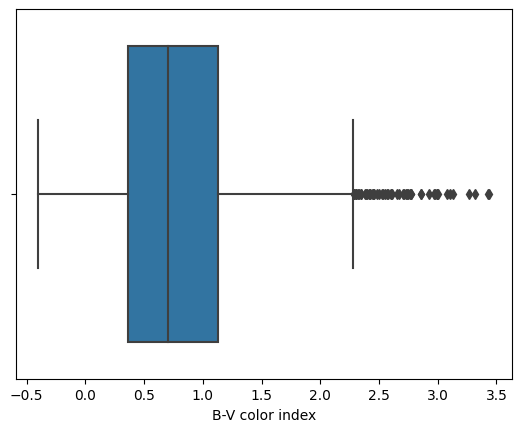

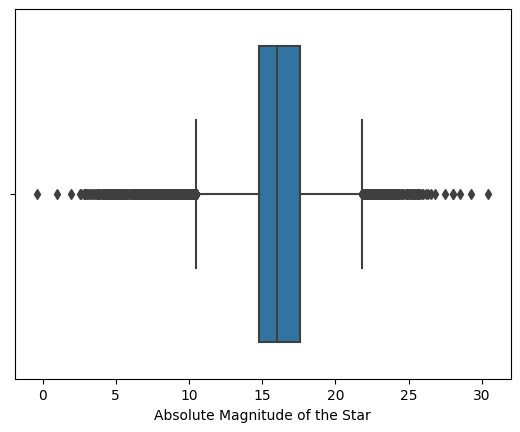

In [28]:
for i in numeric.columns:
    sns.boxplot(data = numeric,x=numeric[i])
    plt.show()

In [29]:
numeric.columns

Index(['Visual Apparent Magnitude of the Star',
       'Distance Between the Star and the Earth',
       'Standard Error of star ad earth', 'B-V color index',
       'Absolute Magnitude of the Star'],
      dtype='object')

### A strip plot is a type of data visualization commonly used in statistical analysis to display the distribution of a single continuous variable. It is a one-dimensional scatter plot where each data point is represented as a dot along an axis. The dots are evenly spaced along the axis based on their numerical value, and they can be jittered horizontally to avoid overlap.

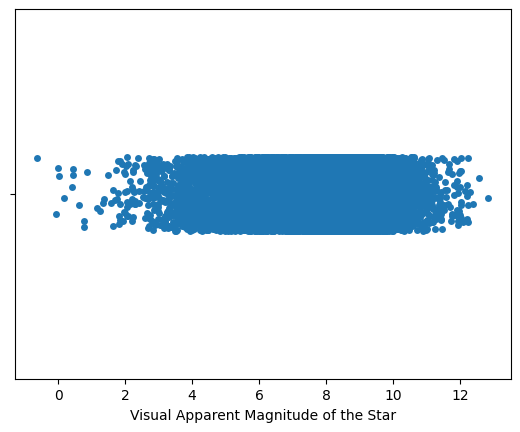

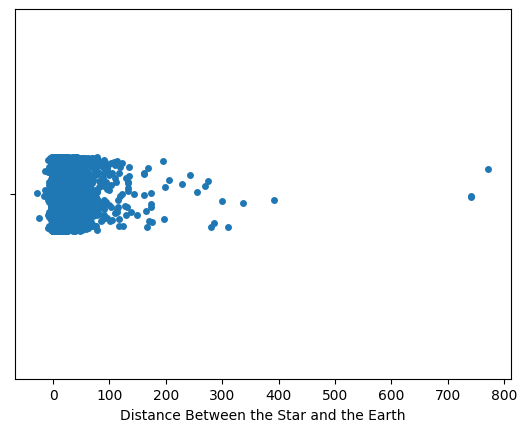

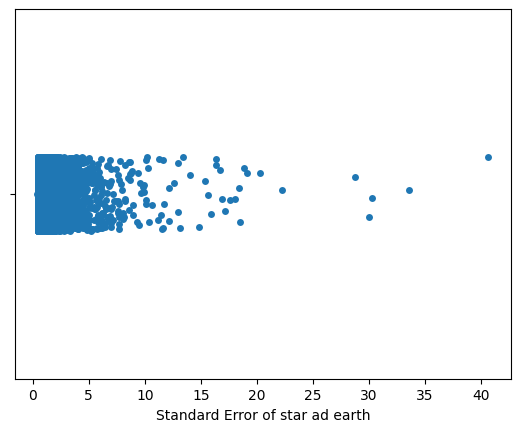

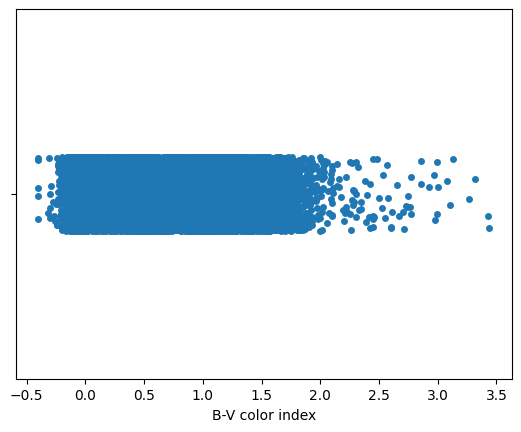

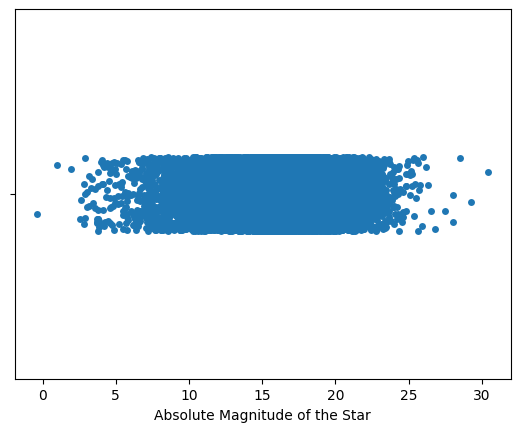

In [30]:
for i in numeric.columns:
    sns.stripplot(data=numeric,x=numeric[i],edgecolor='gray')
    plt.show()
    

# Count Plot

#### Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

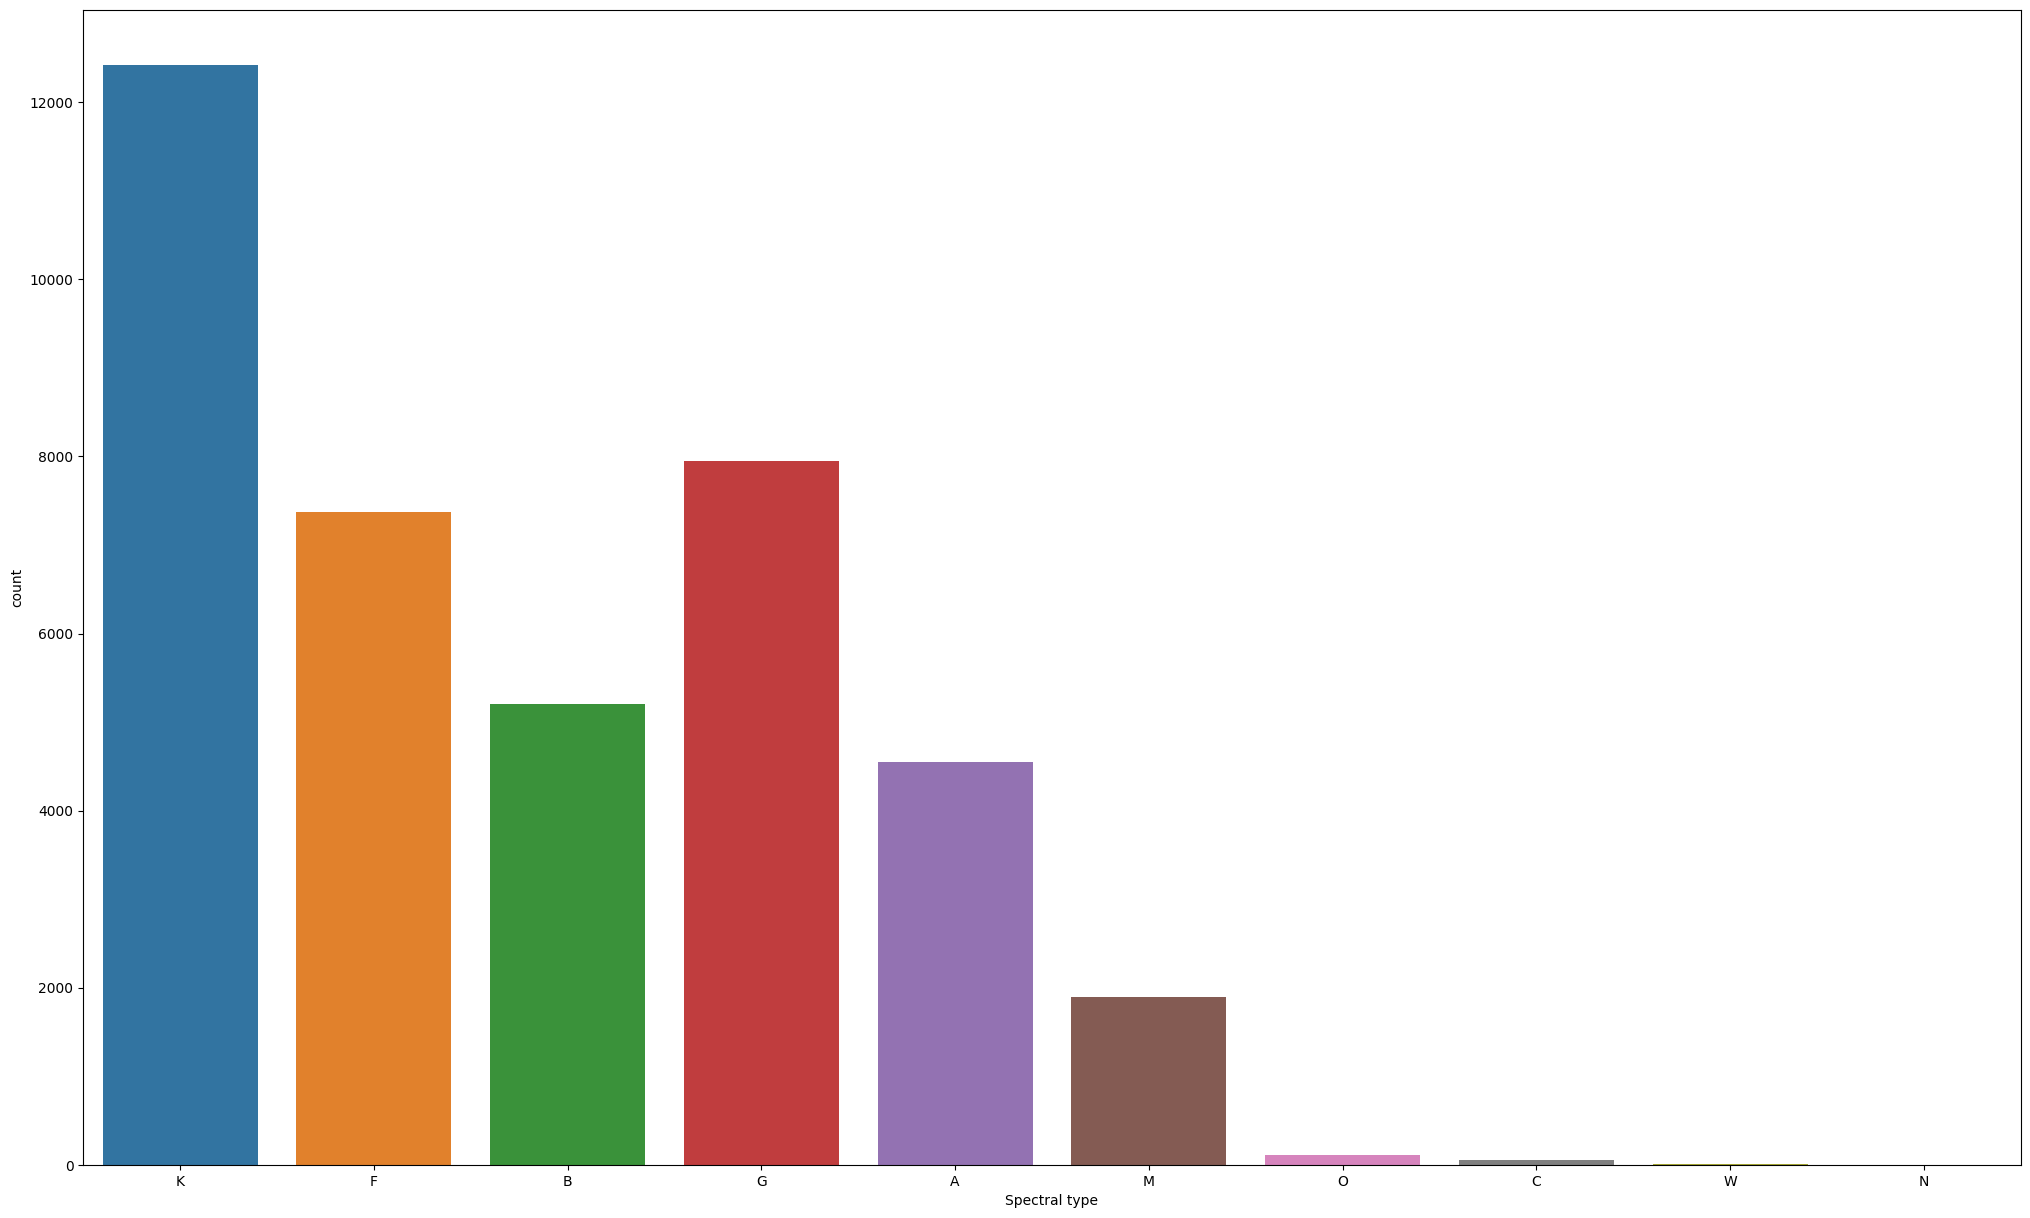

In [41]:
plt.figure(figsize=[25,15])
sns.countplot(x='Spectral type',data=star)
plt.show()

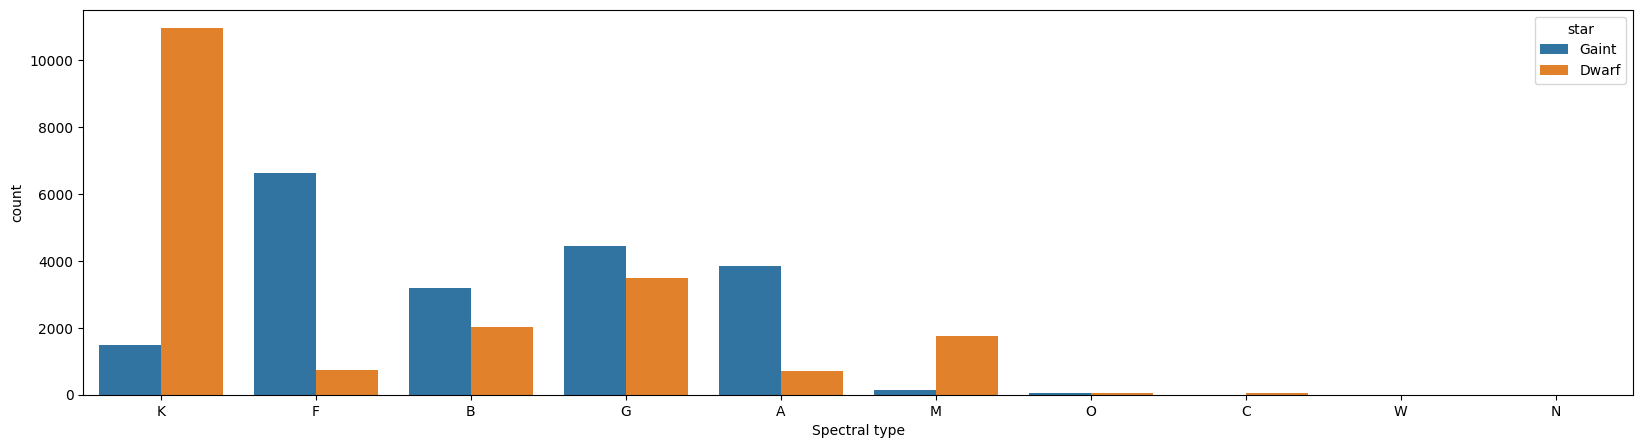

In [42]:
plt.figure(figsize=[20,5])
sns.countplot(x='Spectral type',data=star,hue=star['star'])
plt.show()

In [43]:
## count plot of stars

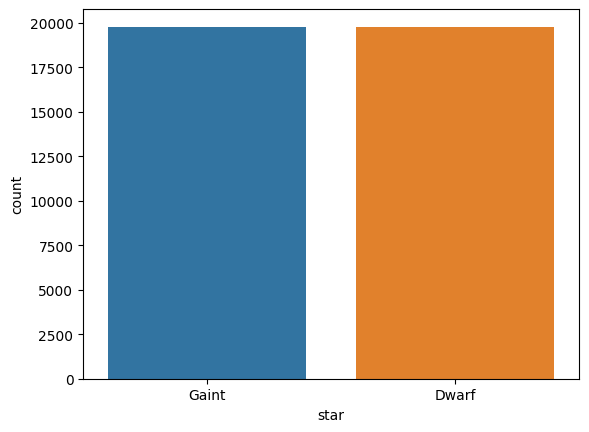

In [44]:
sns.countplot(x='star',data=star)
plt.show()

# Histplot

#### A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

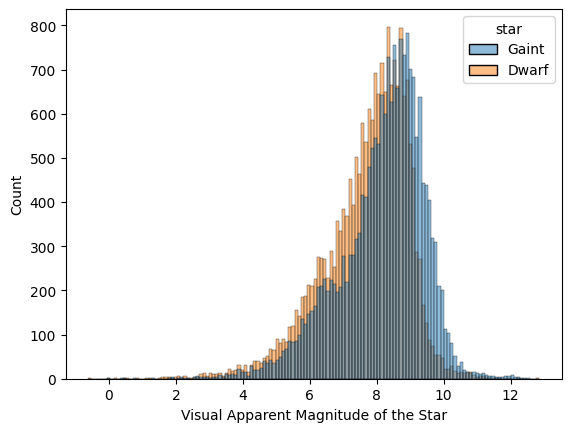

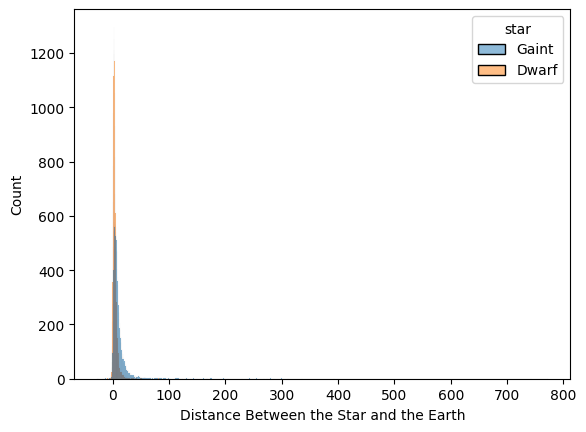

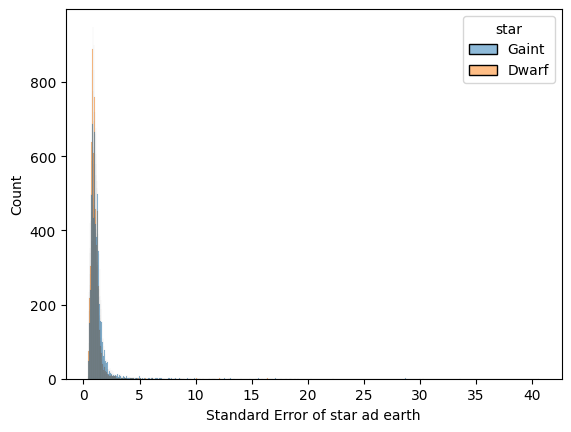

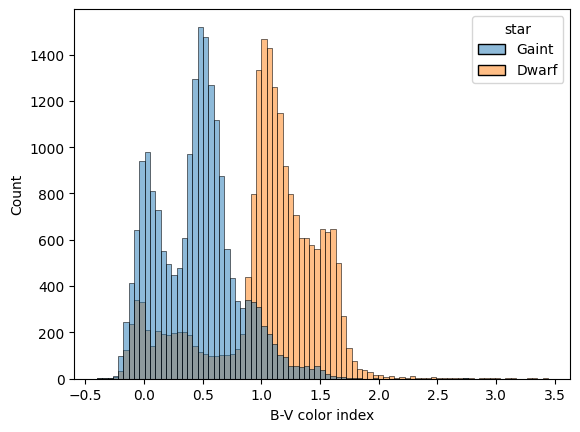

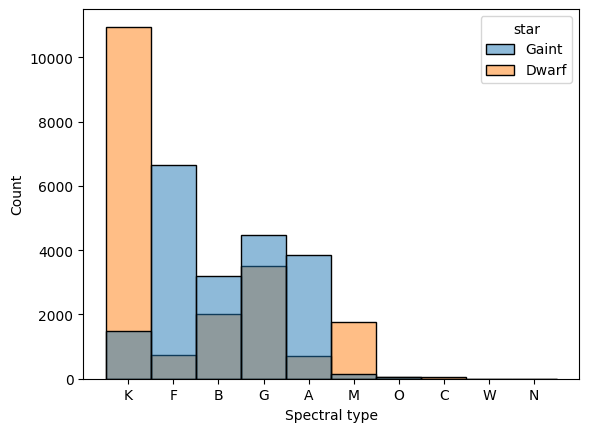

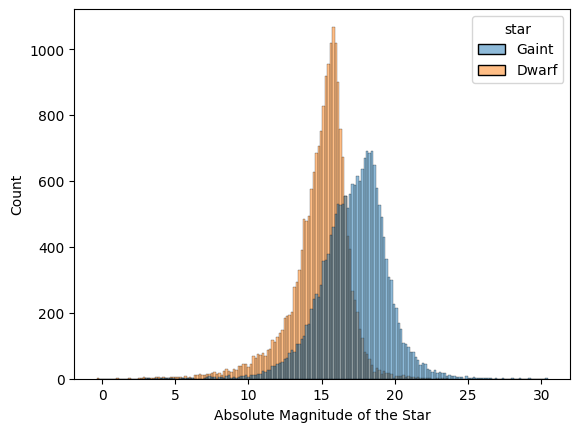

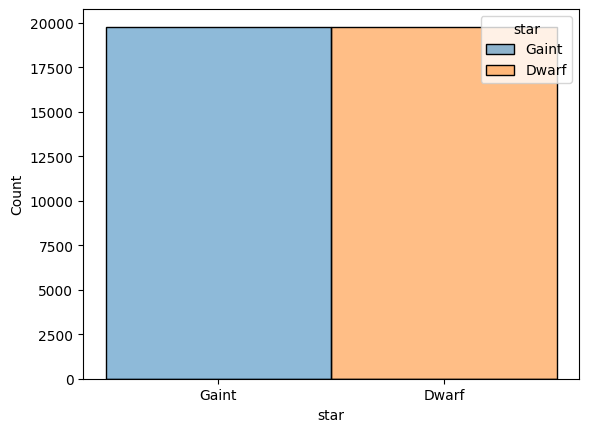

In [40]:
for i in star.columns:
    sns.histplot(x=star[i],data=star,hue=star['star'])
    plt.show()

# Distplot

##### distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution

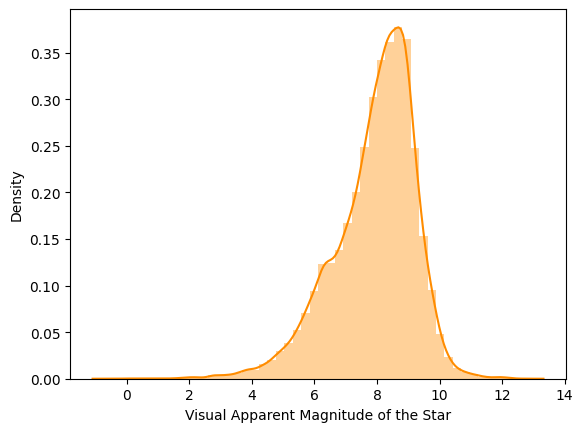

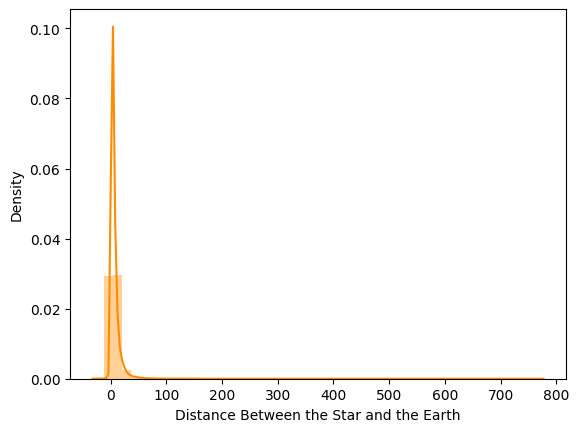

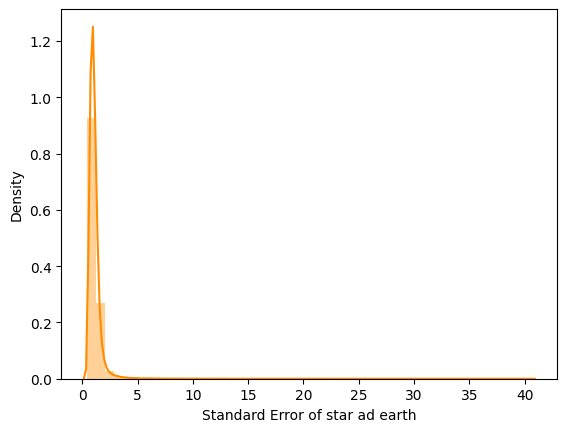

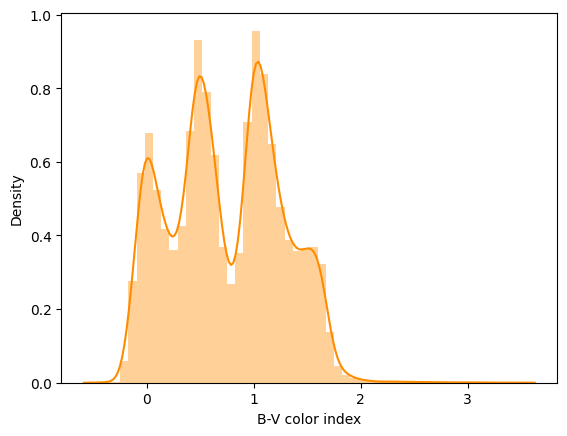

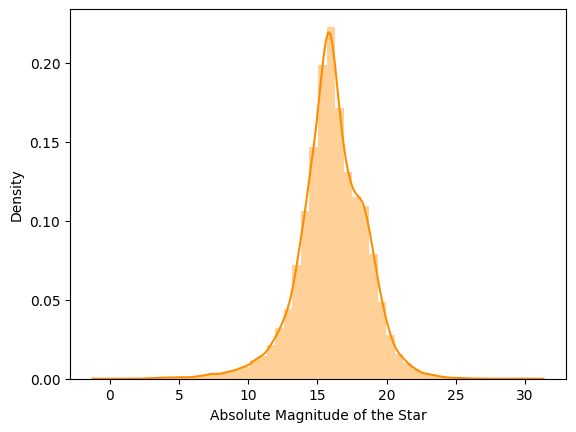

In [39]:
for i in numeric.columns:
    sns.distplot(numeric[i],color='darkorange',vertical=False)
    plt.show()

# Bivariant Analysis

# FacetGrid plot

#### FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

<Figure size 1000x1500 with 0 Axes>

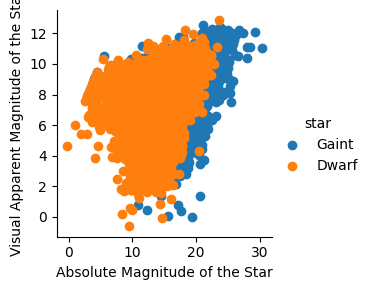

In [35]:
plt.figure(figsize=[10,15])
sns.FacetGrid(star,hue="star",height=3).map(plt.scatter,'Absolute Magnitude of the Star','Visual Apparent Magnitude of the Star').add_legend();
plt.show()

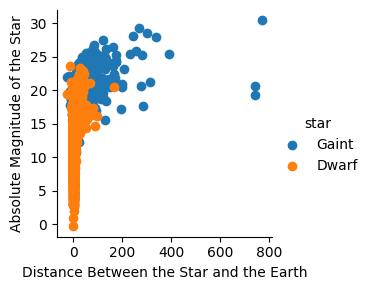

In [36]:
sns.FacetGrid(star,hue="star",height=3).map(plt.scatter,'Distance Between the Star and the Earth','Absolute Magnitude of the Star').add_legend();
plt.show()

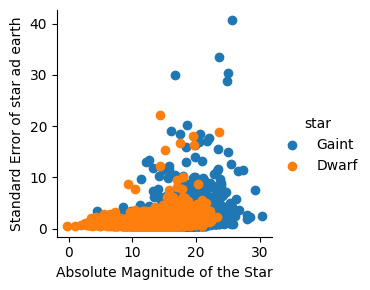

In [37]:
sns.FacetGrid(star,hue="star",height=3).map(plt.scatter,'Absolute Magnitude of the Star','Standard Error of star ad earth').add_legend();
plt.show()

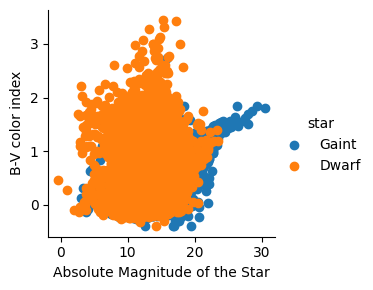

In [45]:
sns.FacetGrid(star,hue="star",height=3).map(plt.scatter,'Absolute Magnitude of the Star','B-V color index').add_legend();
plt.show()

In [136]:
star.columns

Index(['Visual Apparent Magnitude of the Star',
       'Distance Between the Star and the Earth',
       'Standard Error of star ad earth', 'B-V color index', 'Spectral type',
       'Absolute Magnitude of the Star', 'star'],
      dtype='object')

# Line plot

#### A line plot, also known as a line chart or a line graph, is a type of plot used to visualize the relationship between two continuous variables.

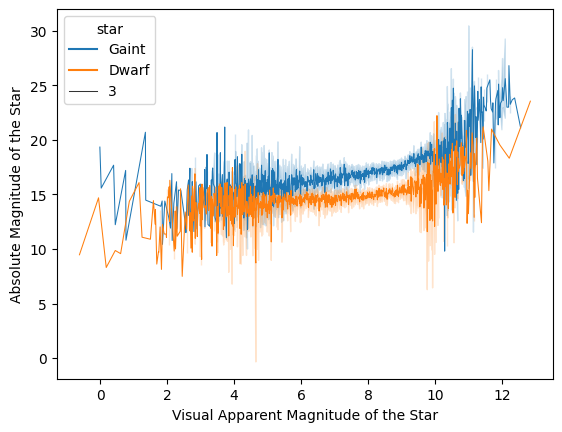

In [51]:
sns.lineplot(data=star,x = 'Visual Apparent Magnitude of the Star',y = 'Absolute Magnitude of the Star',hue=star['star'],size=3)
plt.show()

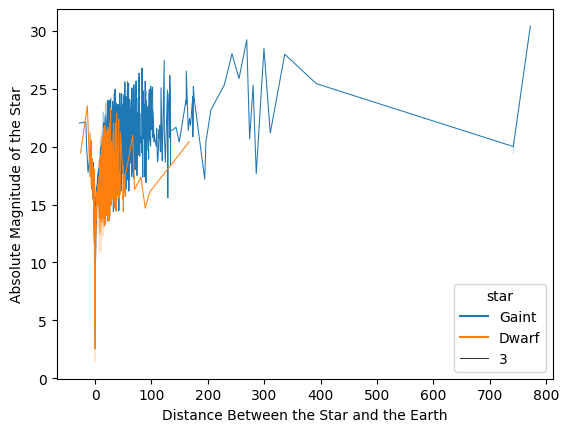

In [50]:
sns.lineplot(data=star,x = 'Distance Between the Star and the Earth',y = 'Absolute Magnitude of the Star',hue=star['star'],size=3)
plt.show()

# Heatmap

#### A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

<Axes: >

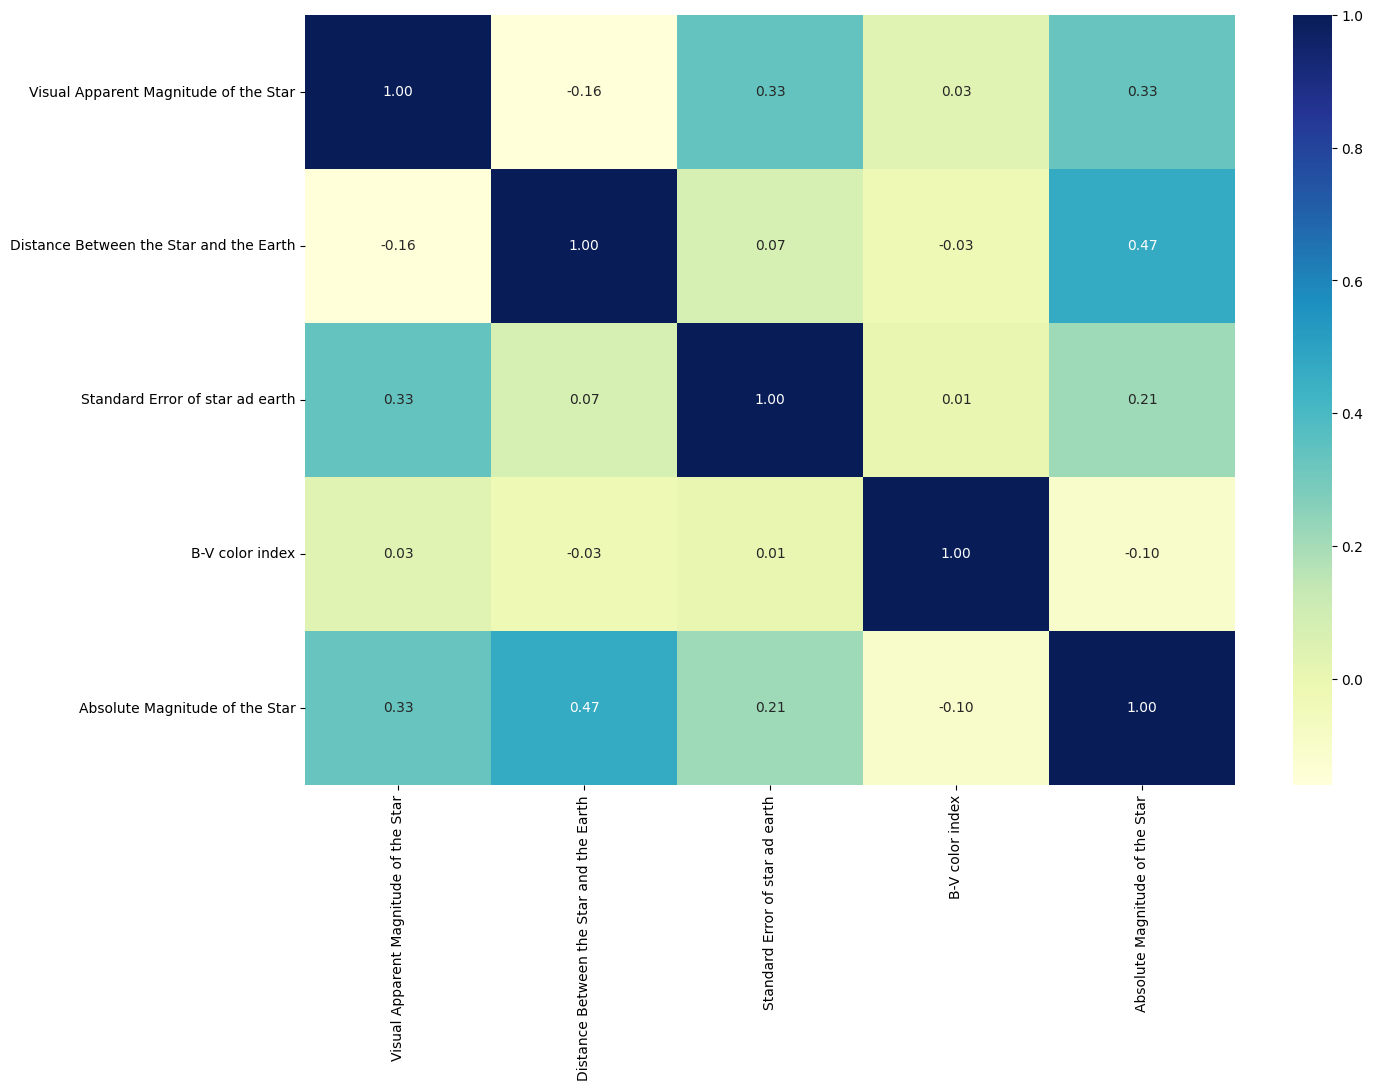

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(star.corr(),cbar=True,fmt='.2f',annot=True,cmap='YlGnBu')

#### point and showing which is high corr and low corr

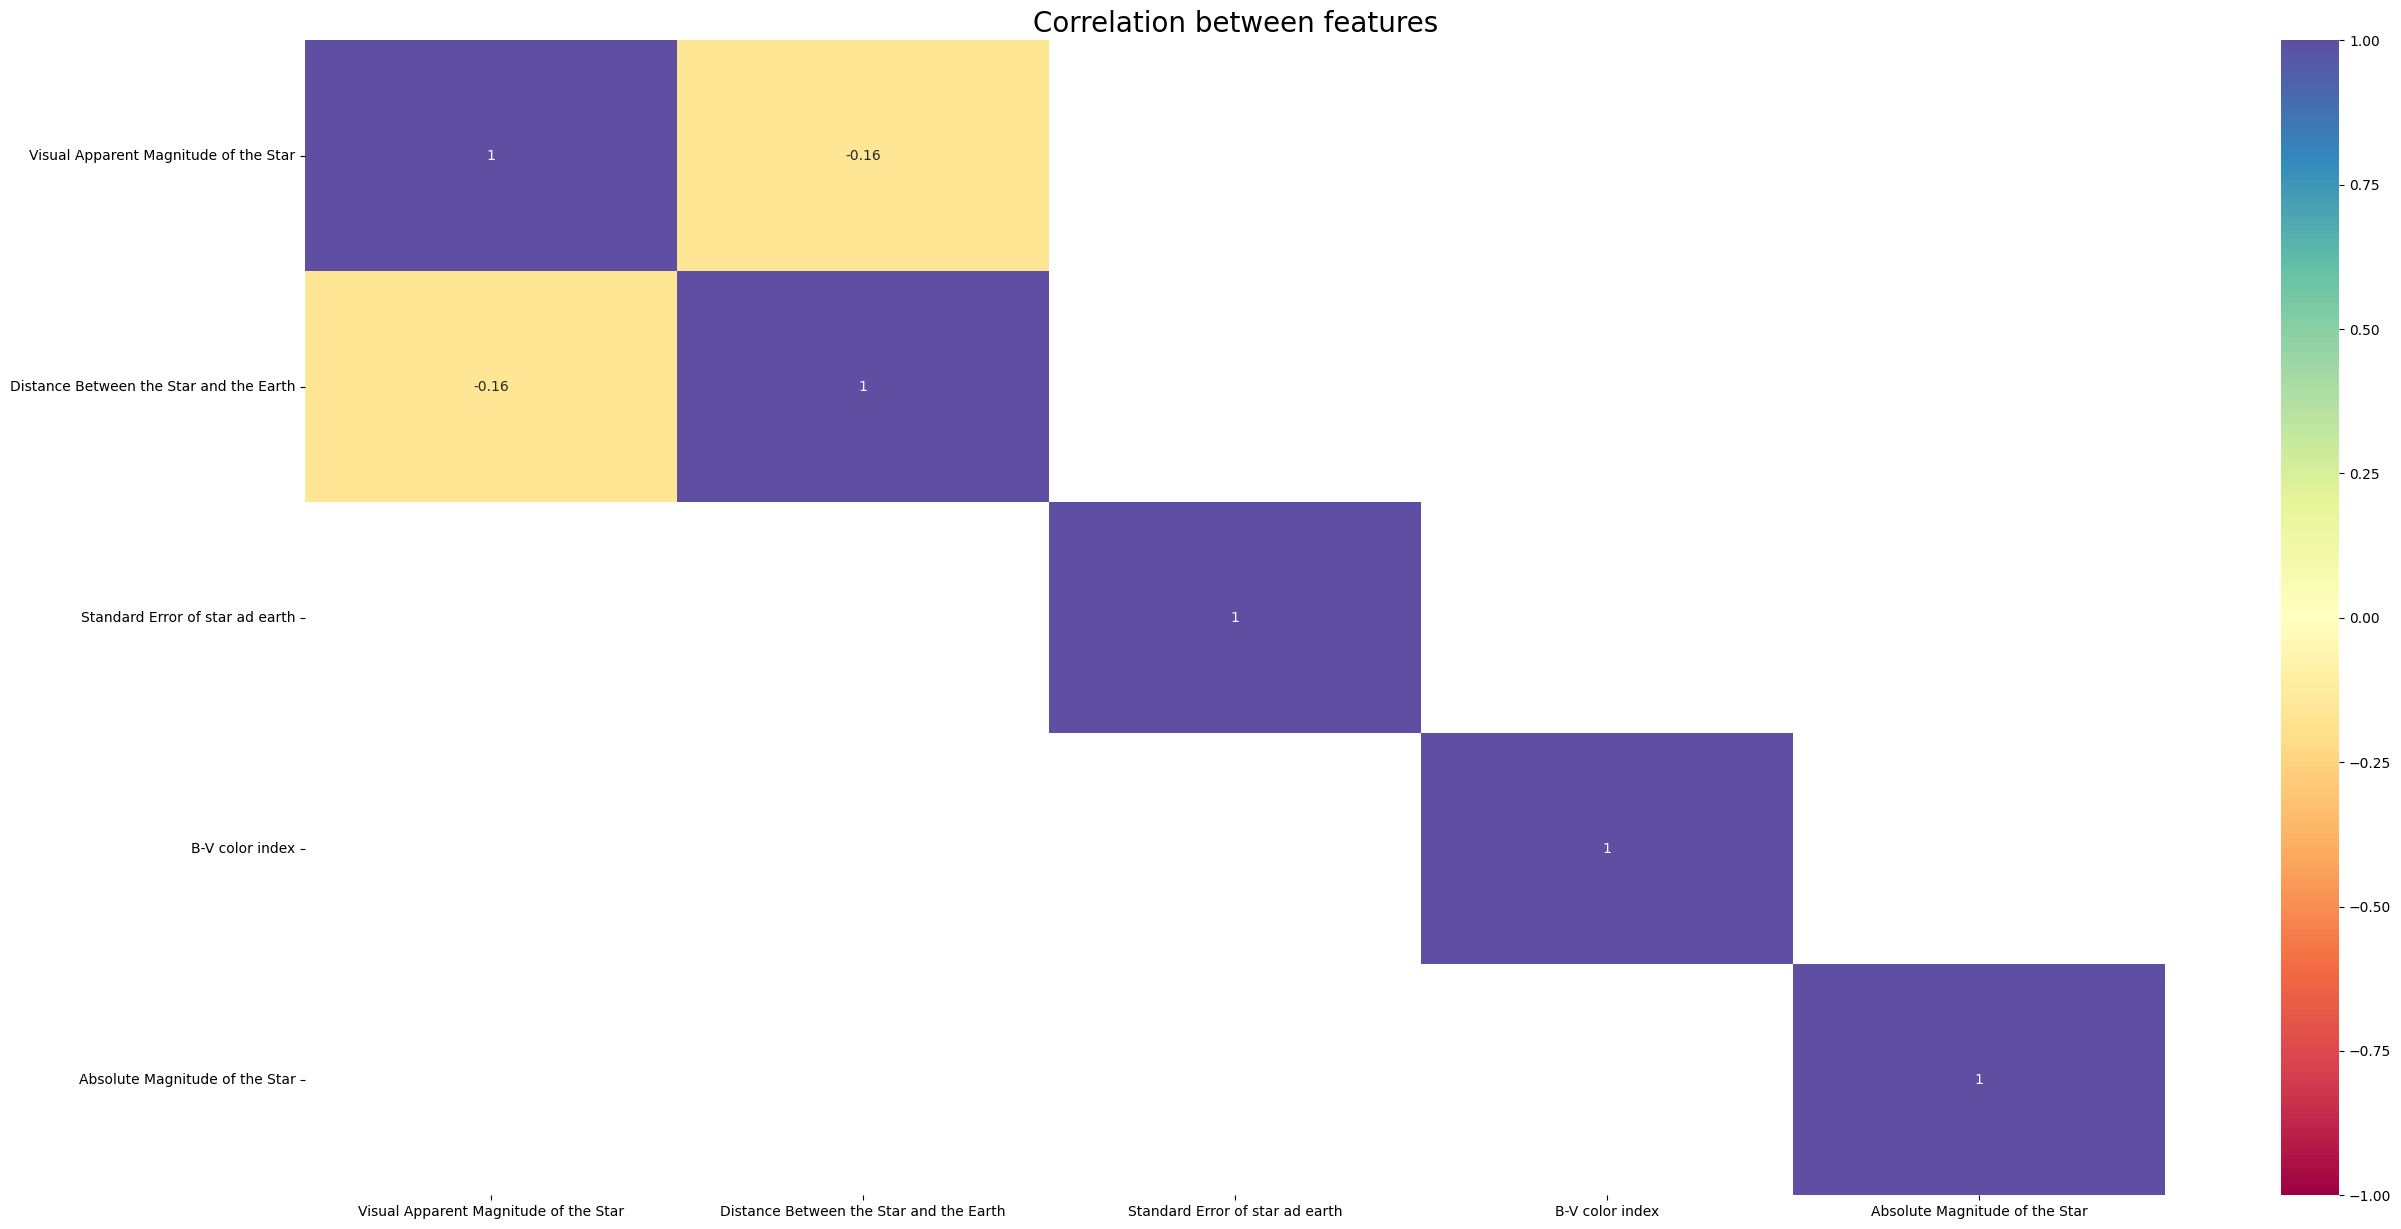

In [54]:
corr = star.corr()
plt.figure(figsize=(30, 15))

sns.heatmap(corr[(corr >= 0.47) | (corr <= -0.16)], 
            cmap="Spectral", vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 10})
plt.title('Correlation between features', fontsize=20)
plt.show()

###### Distance Between the Star and the Earth and Absolute Magnitude of the Star where high correlated

## MULTIVARIANTE

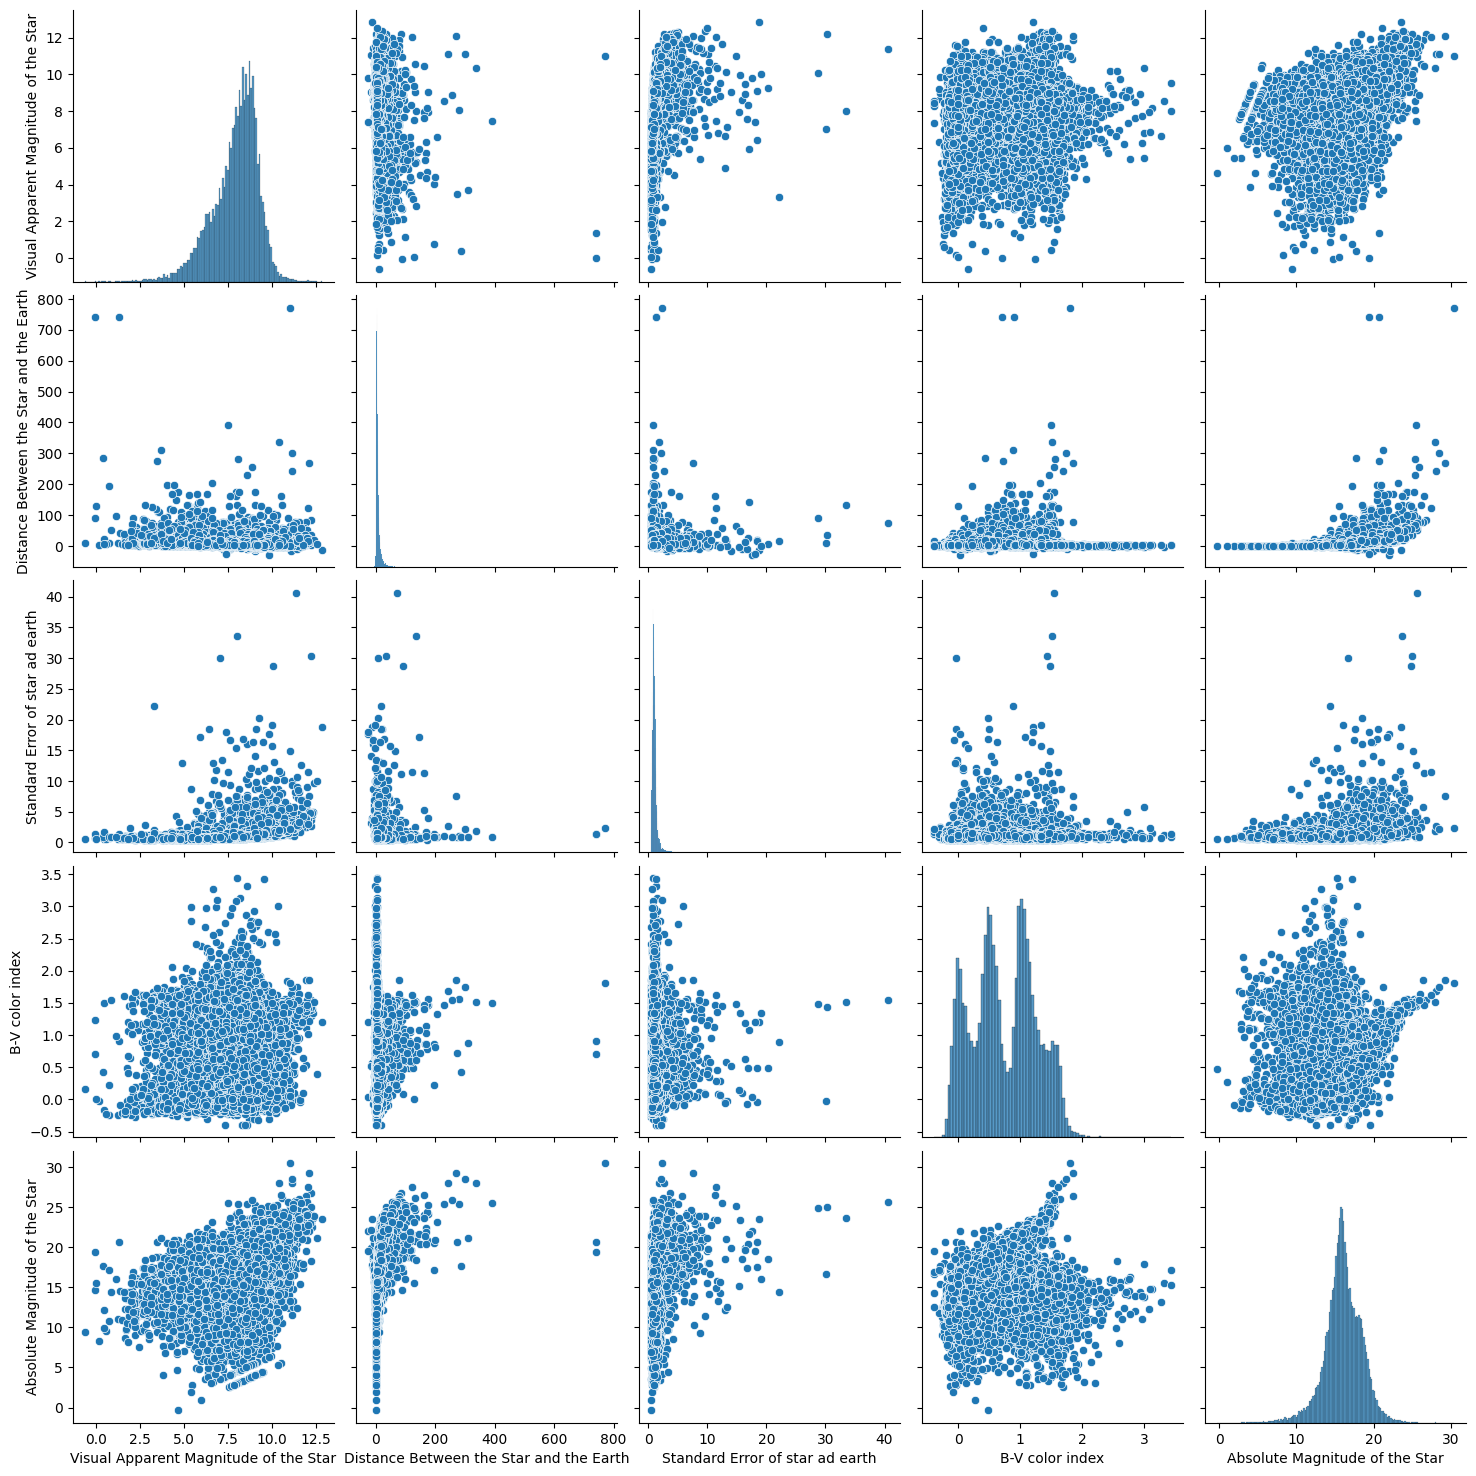

In [55]:
sns.pairplot(data=star,size=3)
plt.show()

#### Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

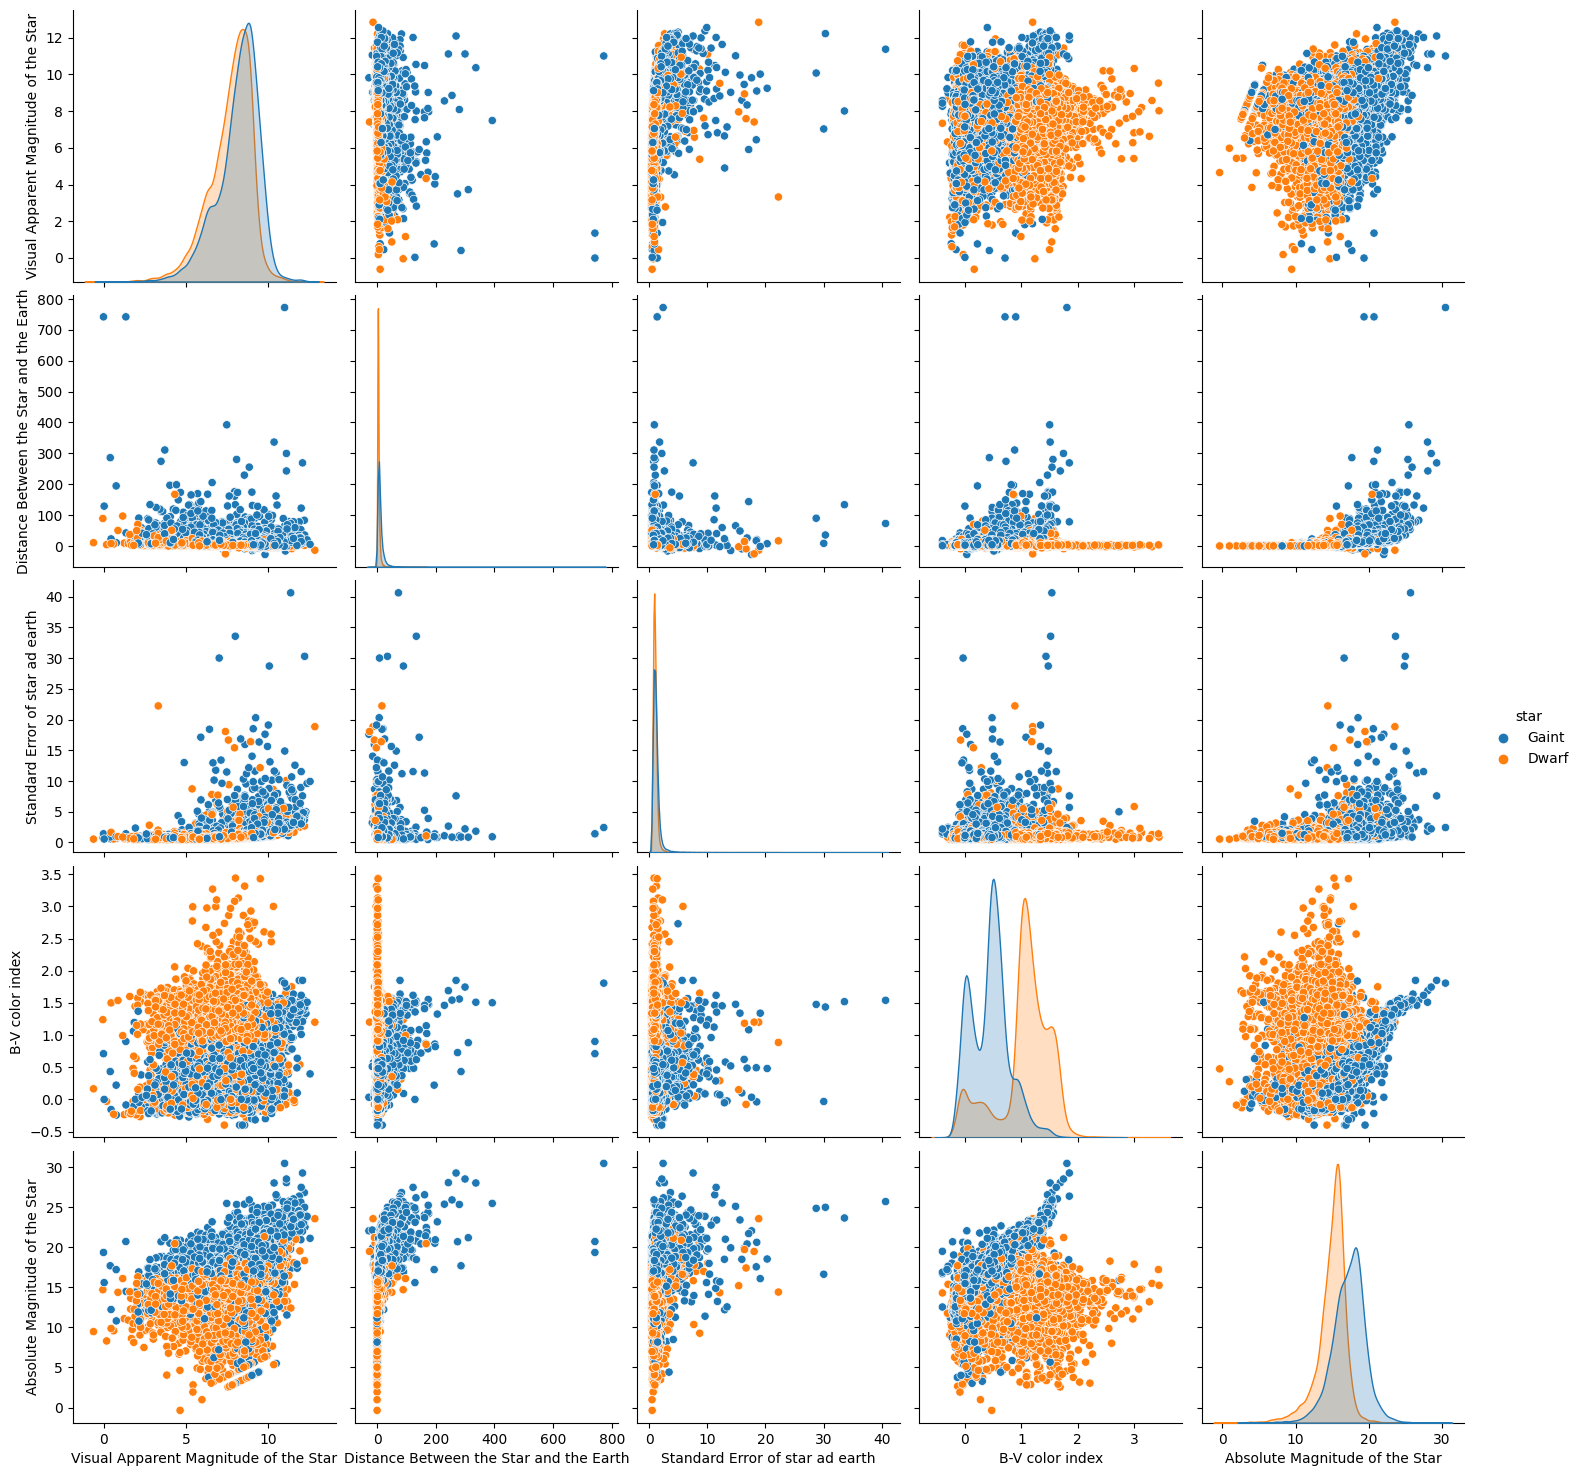

In [56]:
sns.pairplot(star,hue="star",size=3)
plt.show()

In [58]:
## intalling scikit

In [59]:
!pip install scikit-learn

In [60]:
star.columns

Index(['Visual Apparent Magnitude of the Star',
       'Distance Between the Star and the Earth',
       'Standard Error of star ad earth', 'B-V color index', 'Spectral type',
       'Absolute Magnitude of the Star', 'star'],
      dtype='object')

# Mapping a stars

In [64]:
## FontProperties is a class that represents the properties of a font.
## It is used to customize the font properties of text elements such as the title,
## axis labels, legend, and annotations in a plot.

In [65]:
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator

In [66]:
Fonte1 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 18}
Fonte2 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 20}
Fonte3 = FontProperties(family="serif", weight='bold', style='normal', size=19)

In [67]:
star.head()

,Visual Apparent Magnitude of the Star,Distance Between the Star and the Earth,Standard Error of star ad earth,B-V color index,Spectral type,Absolute Magnitude of the Star,star
0,10.00,31.66,6.19,1.213,K,22.502556,Gaint
1,8.26,3.21,1.00,1.130,K,15.792525,Dwarf
2,8.27,12.75,1.06,0.596,F,18.797552,Gaint
3,6.54,5.23,0.76,1.189,K,15.132508,Dwarf
4,8.52,0.96,0.72,0.173,B,13.431356,Gaint


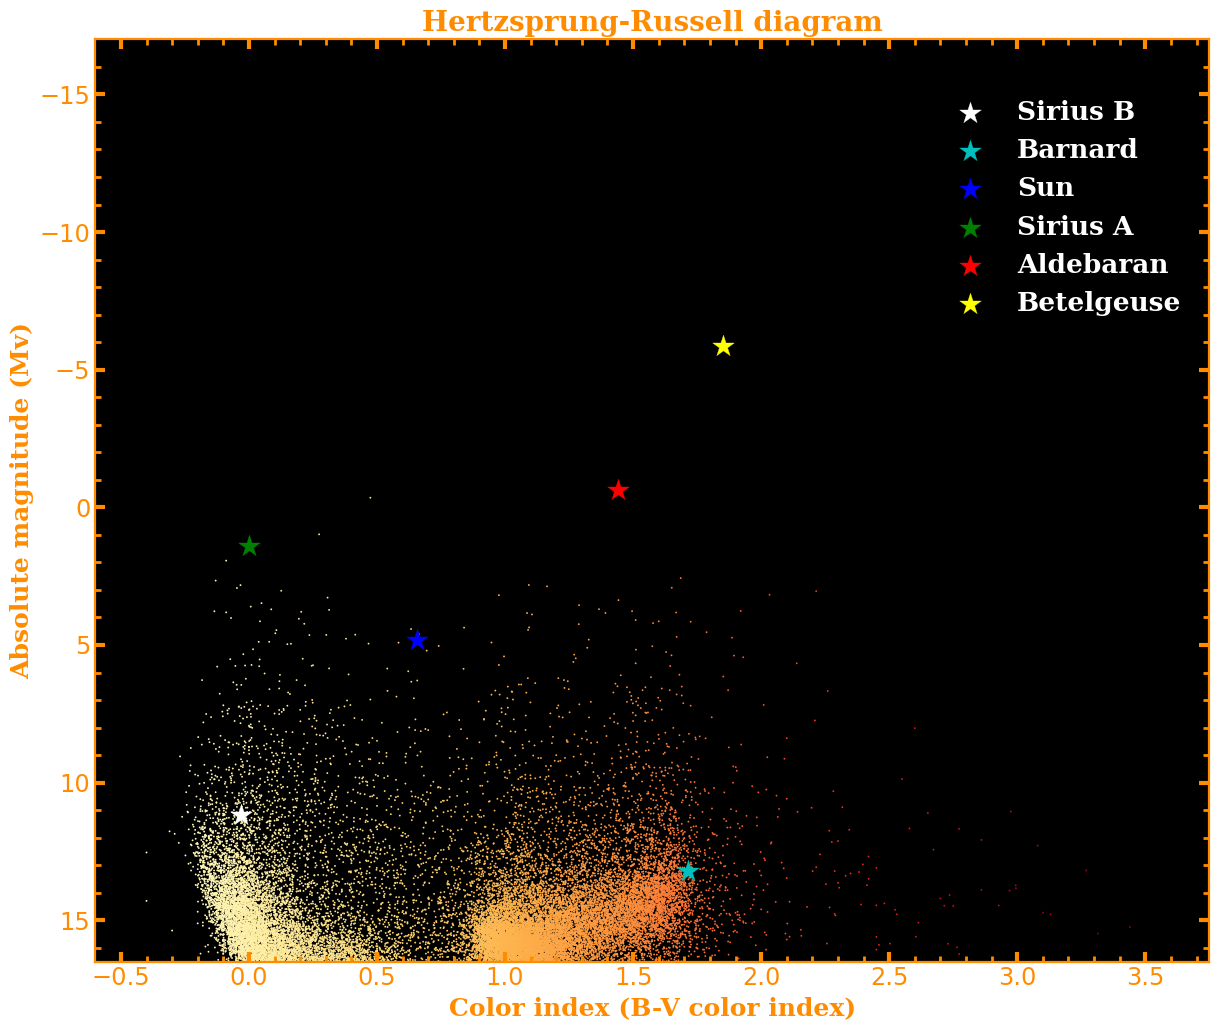

In [68]:
fig, ax = plt.subplots(figsize=(12.5,10.4))
ax.scatter(star["B-V color index"],star['Absolute Magnitude of the Star'], c=star["B-V color index"],  cmap = "YlOrRd", marker = '.', s = 7,linewidth = 0.01)
ax.scatter(x = -0.03, y = 11.18, c = "white", marker = '*', s = 270, linewidth = 0.2, label = "Sirius B")
ax.scatter(x = 1.713, y = 13.21, c = "c", marker = '*', s = 270, linewidth = 0.2, label = "Barnard")
ax.scatter(x = 0.656, y = 4.83, c = "blue", marker = '*', s = 270, linewidth = 0.2, label = "Sun")
ax.scatter(x = 0, y = 1.42, c = "green", marker = '*', s = 270, linewidth = 0.2, label = "Sirius A")
ax.scatter(x = 1.44, y = -0.641, c = "red", marker = '*', s = 270, linewidth = 0.2, label = "Aldebaran")
ax.scatter(x = 1.85, y = -5.85, c = "yellow", marker = '*', s = 270, linewidth = 0.2, label = "Betelgeuse")
plt.xlabel("Color index (B-V color index)", fontdict = Fonte1)
plt.ylabel("Absolute magnitude (Mv)", fontdict = Fonte1)
plt.title("Hertzsprung-Russell diagram", fontdict = Fonte2)
plt.xlim(-0.6, 3.75)
plt.ylim(16.5, -17) 
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='darkorange', labelsize='xx-large', top = True, right = True)
ax.tick_params(which='major', direction = "in", color='darkorange', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='darkorange', width = 2, top = True, right = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color("darkorange") ## The four spines in a plot are: top, bottom, left and right.
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.6)
Color_BC = plt.gca() ## get current axis
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1) ## alpha (transparency) 
plt.legend(frameon = False, prop = Fonte3, labelcolor = "white", bbox_to_anchor = (0.74,0.96), loc = 2)
plt.tight_layout() ## This line adjusts the spacing between plot elements to optimize the layout.
plt.show()    ## frameon(to remove the legend box fram set false)

# LabelEncoder

In [69]:
### encodeing for spectral type

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
lable_encode = LabelEncoder()

In [72]:
lable_encode.fit_transform(star['Spectral type'])

array([5, 5, 3, ..., 0, 6, 3])

In [73]:
star['Spectral type'] = lable_encode.fit_transform(star['Spectral type'])

In [74]:
star['Spectral type']

0        5
1        5
2        3
3        5
4        1
        ..
39547    1
39548    3
39549    0
39550    6
39551    3
Name: Spectral type, Length: 39552, dtype: int32

### spectral tpye are lable as following below

#### A= 0 , B = 1 , C = 2 , F = 3 , G = 4 , M = 6 , N = 7 , O = 8 , W = 9

In [75]:
## encoding for star

In [76]:
lable_encode_1 = LabelEncoder()

In [77]:
lable_encode_1.fit_transform(star['star'])

array([1, 0, 1, ..., 1, 0, 1])

In [78]:
star['star'] = lable_encode_1.fit_transform(star['star'])

In [79]:
star['star']

0        1
1        0
2        1
3        0
4        1
        ..
39547    0
39548    1
39549    1
39550    0
39551    1
Name: star, Length: 39552, dtype: int32

In [80]:
star.value_counts(star['star']) ## checking value of counts

star
0    19776
1    19776
dtype: int64

#### classification of star is labled as following below

#### 0 = Gaint , 1 = Dwarf

# spliting x and y

In [81]:
x = star.iloc[:,:-1]

In [82]:
y = star['star']

# scaling a data

### A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
x_scaled = scaler.fit_transform(x) ###### scaling only for x

In [86]:
x_scaled

array([[0.78841871, 0.0743592 , 0.14349664, 0.42005208, 0.55555556,
        0.74198983],
       [0.65924276, 0.03880425, 0.01442427, 0.3984375 , 0.55555556,
        0.52412471],
       [0.65998515, 0.05072672, 0.01591644, 0.259375  , 0.33333333,
        0.62169365],
       ...,
       [0.72976986, 0.03965407, 0.02586421, 0.16328125, 0.        ,
        0.56851649],
       [0.71492205, 0.03745454, 0.02586421, 0.48619792, 0.66666667,
        0.51955876],
       [0.72308834, 0.03956659, 0.00920169, 0.22916667, 0.33333333,
        0.56431405]])

In [87]:
y

0        1
1        0
2        1
3        0
4        1
        ..
39547    0
39548    1
39549    1
39550    0
39551    1
Name: star, Length: 39552, dtype: int32

# spliting xtrain and ytrain

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [90]:
#### checking shape

In [91]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31641, 6)
(7911, 6)
(31641,)
(7911,)


# LogisticRegression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [93]:
Logistic = LogisticRegression()

In [94]:
Logistic.fit(x_train, y_train)

LogisticRegression()

In [95]:
train_accuracy = Logistic.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.8793969849246231


In [96]:
# Make predictions on the testing data
y_pred = Logistic.predict(x_test)

In [97]:
# Evaluate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8770066995322968


In [98]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [99]:
Prediction = Logistic.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 1 ... 1 1 0]
0.8770066995322968
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3871
           1       0.86      0.90      0.88      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



# Decission tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
Dt = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth = 3, min_samples_leaf = 5) 

In [102]:
# Training the model
Decisiontree = Dt.fit(x_train, y_train) 

In [103]:
Dt_train_accuracy = Decisiontree.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.8793969849246231


In [104]:
# Make predictions on the testing data
Dt_y_pred = Decisiontree.predict(x_test)

In [105]:
# Evaluate the accuracy of the model on the testing data
Dt_test_accuracy = accuracy_score(y_test, Dt_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8770066995322968


In [106]:
Dt_train_accuracy = Decisiontree.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
Dt_test_accuracy = accuracy_score(y_test,Dt_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [107]:
Prediction = Decisiontree .predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 0 ... 1 1 0]
0.8615851346226773
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3871
           1       0.86      0.86      0.86      4040

    accuracy                           0.86      7911
   macro avg       0.86      0.86      0.86      7911
weighted avg       0.86      0.86      0.86      7911



# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
Rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [110]:
Random_model = Rf.fit(x_train,y_train)

In [111]:
Random_model

RandomForestClassifier(random_state=42)

In [112]:
Random_y_pred =Random_model.predict(x_test)

In [113]:
Rf_train_accuracy = Random_model.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
Rf_test_accuracy = accuracy_score(y_test, Random_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [114]:
Prediction = Random_model.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 1 ... 1 1 0]
0.8839590443686007
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3871
           1       0.88      0.90      0.89      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



## KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier(n_neighbors=2)

In [117]:
knn_model = knn.fit(x_train, y_train)

In [118]:
knn_model

KNeighborsClassifier(n_neighbors=2)

In [119]:
# Make predictions on the testing data
knn_y_pred =knn_model.predict(x_test)

In [120]:
knn_test_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8770066995322968


In [121]:
knn_train_accuracy = knn_model.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
knn_test_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [122]:
Prediction = knn_model.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 0 ... 1 0 0]
0.83225888004045
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      3871
           1       0.90      0.75      0.82      4040

    accuracy                           0.83      7911
   macro avg       0.84      0.83      0.83      7911
weighted avg       0.84      0.83      0.83      7911



# Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
nb = GaussianNB()

In [125]:
nb.fit(x_train, y_train)

GaussianNB()

In [126]:
nb_y_pred = nb.predict(x_test)


In [127]:
nb_train_accuracy = nb.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
nb_test_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [128]:
Prediction = nb.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 1 ... 1 1 0]
0.8475540386803185
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3871
           1       0.86      0.84      0.85      4040

    accuracy                           0.85      7911
   macro avg       0.85      0.85      0.85      7911
weighted avg       0.85      0.85      0.85      7911



# SVM

In [129]:
from sklearn import svm

In [130]:
svm = svm.SVC(kernel='linear')

In [131]:
svm_model = svm.fit(x_train, y_train)

In [132]:
svm_model

SVC(kernel='linear')

In [133]:
svm_y_pred =svm_model.predict(x_test)

In [134]:
svm_train_accuracy = svm_model.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [135]:
Prediction = svm_model.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 1 ... 1 1 0]
0.8776387308810517
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3871
           1       0.86      0.90      0.88      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



# Adaboosting

In [136]:
from sklearn.ensemble import AdaBoostClassifier

In [137]:
adaboost = AdaBoostClassifier()

In [138]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [139]:
adaboost_y_pred = adaboost.predict(x_test)

In [140]:
adaboost_train_accuracy = adaboost.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
adaboost_test_accuracy = accuracy_score(y_test, adaboost_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [141]:
Prediction = adaboost.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 1 ... 1 1 0]
0.8782707622298066
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3871
           1       0.87      0.90      0.88      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



# xgboost

In [142]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
from xgboost import XGBClassifier

In [144]:
xgb = XGBClassifier()

In [145]:
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [146]:
xgb_y_pred = xgb.predict(x_test)

In [147]:
xgb_train_accuracy = xgb.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")
svm_test_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8793969849246231
Test Accuracy: 0.8770066995322968


In [148]:
Prediction = xgb.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Prediction)
print(Score)
print(Report)

[1 1 0 ... 1 1 0]
0.8857287321451144
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3871
           1       0.88      0.90      0.89      4040

    accuracy                           0.89      7911
   macro avg       0.89      0.89      0.89      7911
weighted avg       0.89      0.89      0.89      7911

